In [358]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle

In [359]:
#Importing(reading) the dataset

auto = pd.read_csv('https://raw.githubusercontent.com/harshlangade19/Data_Analysis_MS_Engage_2022/main/Car_sales.csv')
auto.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Sedan,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Sedan,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Sedan,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Sedan,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Sedan,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [360]:
auto.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [335]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [336]:
auto.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [337]:
#Defining a function for dealing with missing values(null values)

def missing_value(var, stats = 'mean'):
    if (var.dtypes == 'float64') | (var.dtypes == 'int64'):
        var = var.fillna(var.mean()) if stats == 'mean' else var.fillna(var.median())
    else:
        var = var.fillna(var.mode())
    return var

In [338]:
#Seperating continuous and categorical features in the dataset and deal with missing values

continuous_vars = auto.loc[:, (auto.dtypes == 'float64') | (auto.dtypes == 'int64')]
continuous_vars = continuous_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
continuous_vars = continuous_vars.apply(missing_value)

In [339]:
auto['Vehicle_type'].isna().sum()

0

In [340]:
#Label Encoding 'Vehicle_type' feature to convert it into numeric data

le = LabelEncoder()
auto['Vehicle_type'] = le.fit_transform(auto['Vehicle_type'])

In [341]:
#Creating final dataset by concatenation

auto_new = pd.concat([continuous_vars, auto['Vehicle_type']], axis = 1)
auto_new.head(157)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type
0,16.919,16.360000,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,39.384,19.875000,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1
2,14.114,18.225000,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,76.849583,1
3,8.588,29.725000,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,1
4,20.397,22.255000,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.020008,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,1
153,15.245,18.020008,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,1
154,17.531,18.020008,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,1
155,3.493,18.020008,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,1


In [342]:
#Dropping unneccessary feature columns from the dataset

auto_new.drop(['__year_resale_value', 'Power_perf_factor'], axis = 1, inplace = True)

In [343]:
#Seperating input features(for model) and label column

X = auto_new.drop(['Sales_in_thousands'],axis=1)
y = auto_new['Sales_in_thousands']
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [344]:
#Seperating the data into training data and test data

X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [345]:
#Implementing feature scaling on the data

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_cv)

array([[ 2.6827126 ,  0.25460082,  1.8063387 , -1.5802824 , -0.4784332 ,
        -0.77045846, -0.49688262, -0.28722104, -0.12026401,  0.57735026],
       [-0.6450704 , -0.67509377, -0.71323055,  0.765645  ,  1.6203845 ,
        -0.01262366,  0.19771862,  0.42587954,  0.13072175, -1.7320508 ],
       [-0.9186567 , -0.8610328 , -0.93159324, -0.01537394, -0.6221878 ,
         0.25069118, -0.74712104, -1.2142518 ,  1.1346648 ,  0.57735026],
       [-0.2858945 , -0.11727711,  0.29459712,  0.05353929,  0.15408605,
         0.34702608,  0.02179349,  0.06932923,  0.63269323,  0.57735026],
       [ 0.3558171 ,  0.8124175 ,  0.96648216,  0.82307285,  0.9303621 ,
         1.2140402 ,  0.85592157,  0.06932923, -0.37124977,  0.57735026],
       [-0.34896046, -0.5821244 , -0.41088223, -0.07280178, -0.56468683,
         0.41767207, -0.1071173 , -0.52492124,  0.13072175,  0.57735026],
       [ 2.893521  ,  1.7421122 ,  1.8399329 , -0.8767915 ,  0.03908415,
        -0.60347754,  1.0955439 ,  0.68734986

In [346]:
#Building ml models for prediciton and choosing the best one 

#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators=50,random_state=10)
#from sklearn.svm import SVR
#regressor = SVR(kernel='rbf')
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.5)


In [347]:
#Fitting the model on training data

regressor.fit(X_train,y_train)

Lasso(alpha=0.5)

In [348]:
#Predicting the required output using test data

predictions = regressor.predict(X_cv)
predictions

array([-98.44173  ,  65.06688  ,  72.40192  ,  41.5056   ,  45.883865 ,
        42.378006 , -50.74774  , -21.818222 ,  16.637344 ,  52.701965 ,
        79.93678  , 139.63829  ,  44.087616 ,  58.905838 ,  35.41533  ,
        55.68828  , -95.621315 ,  86.886    , -36.726624 ,  32.189484 ,
        81.52327  ,  68.79578  ,  71.73866  ,  33.653122 ,  66.59842  ,
        59.937927 , 108.45555  ,   8.757431 ,  51.179825 ,  24.080704 ,
        49.866364 ,  -3.0102997,  57.520157 , 118.10881  , -28.098007 ,
        31.266998 ,  44.646927 , 125.528946 ,  34.727936 ,  21.21643  ,
        53.60771  ,  32.892944 ,  44.981003 ,  37.131393 ,  51.16629  ,
        39.81877  ,  89.319016 ,  63.355423 ], dtype=float32)

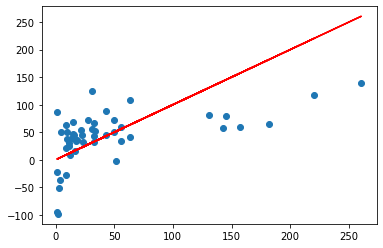

In [349]:
plt.scatter(y_cv,predictions)
plt.plot(y_cv,y_cv,color='r')

In [350]:
#Evaluating error metrics

mae = mean_absolute_error(y_cv,predictions)
mse = mean_squared_error(y_cv,predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  41.13539
Mean Squared Error =  2775.3723
Root Mean Squared Error =  52.6818


In [330]:
#Creating a new,random input set

x = np.array([[23.98,1.8,150,102.8,68,178,2.99,16.5,27.1,1]])
x = x.astype(float)
x

array([[ 23.98,   1.8 , 150.  , 102.8 ,  68.  , 178.  ,   2.99,  16.5 ,
         27.1 ,   1.  ]])

In [307]:
#Predicting output for above defined input

y = regressor.predict(x)
y

array([24.0435397])

In [308]:
# Saving model to disk

pickle.dump(regressor, open('model_sales.pkl','wb'))

In [309]:
# Loading model to compare the results

model = pickle.load(open('model_sales.pkl','rb'))
print(model.predict([[23.98,1.8,150,102.8,68,178,2.99,16.5,27.1,1]])) 

[24.0435397]
